# 2.2 Probability Distributions

<a target="_blank" href="https://colab.research.google.com/github/SaajanM/mat422-homework/blob/main/2.2%20Probability%20Distrobitions/probability_distributions.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

In [ ]:
# Install a numpy package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

In [2]:
# Import the numpy package
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplt
from mpl_toolkits.mplot3d import Axes3D
import math

$\newcommand\norm[1]{\left\lVert#1\right\rVert}$

This section covers the basics of probability distributions.

## Section 2.2.0 Probability Distributions

Probability and statistics rely on the idea of a random distribution of data. As we will see, various types of distributions are useful in modeling real world data. This is exceedingly helpful as it allows us to simplify and organize our assumptions about real world data into rigorously defined mathematical objects.

## Section 2.2.1 Axioms of Probability

**Definition:** An **experiment** is any activity whose outcome is subject to uncertainty.

**Definition:** The **sample space** of an experiment (denoted by $S$) is the set of all possible outcomes of the experiment.

More often than not it is more useful to study a collection of outcomes. We call a collection of outcomes an **event**.

**Definition:** Given a sample space $S$, a **probability distribution** $P$ is a function that assigns each event $A\subseteq S$ which gives the precise chance (in [0,1]) that $A$ occurs. Any probability distribution must follow the following properties:
- $P(S)=1$
- If $A_1,\dots$ is an infinite collection of disjoint events then 
  $$P(A_1\cup\dots) = \sum_{i=1}^\infty P(A_i)$$
- For any event $A$, $P(A) + P(A') = 1$, where $A'$ is the complement of $A$ under $S$
- When events $A,B$ are mutually exclusive, $P(A\cup B)=P(A)+P(B)$
- For any two events $A,B$, we have that $P(A\cup B) = P(A) + P(B) - P(A\cap B)$

## Section 2.2.2 Conditional Probability

**Definition:** The **conditional probability** of event $A$ given event $B$ -- denoted $P(A\mid B)$ -- is defined as the chance that event $A$ has occurred given that event $B$ has occured.

It can be thought of as the ratio of the  probability of the intersection of the two events to the probability of the conditioning event ($B$):
$$
P(A\mid B) = \frac{P(A\cap B)}{P(B)}
$$

We can rearrange that to $P(A\cap B) = P(A\mid B) \cdot P(B)$

It is nice to know if two events have bearing on each other, so we define events $A,B$ as **independent**
if $P(A\mid B) = P(A)$ or $P(B\mid A) = P(B)$

Below is code showing how two coin flips landing on heads are independent.

In [35]:
coin_one_flips = np.random.choice(2,100000)
coin_two_flips = np.random.choice(2,100000)

portion_heads_one = np.sum(coin_one_flips) / 100000
portion_heads_two = np.sum(coin_two_flips) / 100000

intersection = np.sum(np.multiply(coin_one_flips,coin_two_flips)) / 100000

a_given_b = intersection / portion_heads_one

print("Conditional: {}".format(a_given_b))
print("Event A: {}".format(portion_heads_one))

print("Are roughly the same: {}".format("Yes" if np.allclose(a_given_b, portion_heads_one,atol=0.1) else "No"))


Conditional: 0.4961790829799152
Event A: 0.49988
Are roughly the same: Yes



## Section 2.2.3 Discrete Random Variables

A random variable is understood as a measurable function defined on a probability space that maps from the sample space to the real numbers. That is, it is a mapping that associates each outcome with a number.

A discrete random variabe is a random variable that is either finite or countably infinite.

I will electively omit the discussions of both probability mass functions and cumulative distribution functions in favor of presenting what they generally represent.

Simply put, a probability mass function for a discrete random variable gives the probability that a discrete random variable takes on a certain value exactly. A cumulative distribution function represents that a discrete random variable takes on a certain value or less.

There are two main distribution types in discrete space that are important to discuss: Binomial and Poisson.

A Binomial distribution is used to represent a series of independent "success/failure" (Bernoulli) experiments. The CDF for a Binomial distribution with $n$ trials and a probability of $p$ per success is
$$
P(X\leq x) = \sum_{i=0}^x \begin{pmatrix}n\\ y\end{pmatrix} p^x(1-p)^{n-x}
$$

A Poisson (French for fish!) distribution is a discrete probability distribution that describes the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

The PMF for a Poisson distribution with parameter $\mu$ (mean number of events) is
$$
P(X=x) = \frac{e^{-\mu}\mu^x}{x!}
$$

A Binomial distribution is shown in code below.

(array([  1.,   6.,  58., 117., 200., 228., 217., 107.,  52.,  14.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 11 artists>)

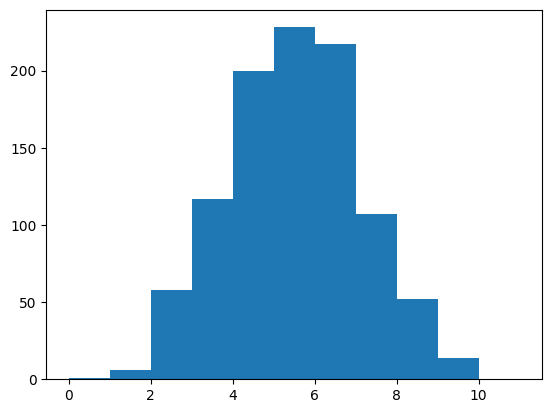

In [66]:
dist = np.random.binomial(10,0.5,1000)

fig = pyplt.figure()

ax = fig.add_subplot()

ax.hist(dist,np.array(range(0,12)))

## Section 2.2.3.1 Expected Value and Variance

**Defintion:** The expected value -- $E(X)$ or $\mu$ -- of a discrete random variable $X$ is given by the weighted arithmetic mean of the possible outcomes of $X$ with each weight being the probability of the event occuring.

The expected value allows us to infer the most "common" outcome of the data.

**Definition:** The **variance** -- $V(X)$ or $\sigma^2$ -- of a discrete random variable $X$ is defined as the weighted average of the squares of the differences between the expected value and the outcomes of $X$.

Variances allow us to determine the "spread" of data around the expected value.

We define the **standard deviation** as the square root of the variance.

A binomial distribution has $E(X)=np$ and $V(X)=np(1-p)$

A poisson distribution has $E(X)=V(X)=\mu$

## Section 2.2.4 Continuous Random Variables
Often times we work with real valued data, where the sample space is continuous and uncountable.

The major differences between discrete and continuous random variables are that:
- we cannot calculate the probability at a point (it is 0)
- we use exclusively CDFs and Probability Density Functions (PDFs) to describe them
- Summations are generally replaced with integrals with the total area equal to 1

Expected value can be derived by replacing the summation with an integral and the PMF with a PDF.
Variance is similar

One of the most common continuous random distribution types that we commonly work with is the **normal distribution**.

Definition 2.2.24 A continuous random variable X is said to have a normal
distribution with parameters $\mu$ and $\sigma$ (or $\mu$ and $\sigma^2$), where $-\infty < \mu < \infty$ and $0 < \sigma$, if the pdf of $X$ is
$$
f(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$

The normal distribution has some interesting properties. Firstly, it is the natural extension of the binomial distribution into continuous space.

To make the normal distribution even more friendly to work with, we can often represent our data as a modification of the **standard normal distribution**. The std normal distribution is a normal distribution with mean zero and variance one.

Below is demostrating some normally distributed data using python.

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 7.000e+00, 1.900e+01, 2.100e+01,
        2.700e+01, 4.700e+01, 5.600e+01, 5.800e+01, 9.800e+01, 1.020e+02,
        1.590e+02, 2.080e+02, 2.790e+02, 3.420e+02, 3.740e+02, 4.780e+02,
        5.810e+02, 6.860e+02, 8.530e+02, 1.003e+03, 1.198e+03, 1.381e+03,
        1.542e+03, 1.803e+03, 2.044e+03, 2.261e+03, 2.600e+03, 2.666e+03,
        3.044e+03, 3.237e+03, 3.528e+03, 3.714e+03, 3.729e+03, 3.740e+03,
        3.906e+03, 4.061e+03, 3.950e+03, 3.955e+03, 3.747e+03, 3.782e+03,
        3.682e+03, 3.339e+03, 3.310e+03, 2.960e+03, 2.808e+03, 2.554e+03,
        2.338e+03, 2.075e+03, 1.875e+03, 1.564e+03, 1.440e+03, 1.230e+03,
        1.068e+03, 8.900e+02, 7.200e+02, 5.740e+02, 4.670e+02, 4.120e+02,
        3.250e+02, 2.560e+02, 2.070e+02, 1.510e+02, 1.200e+02, 8.500e+01,
        6.300e+01, 4.600e+01, 4.800e+0

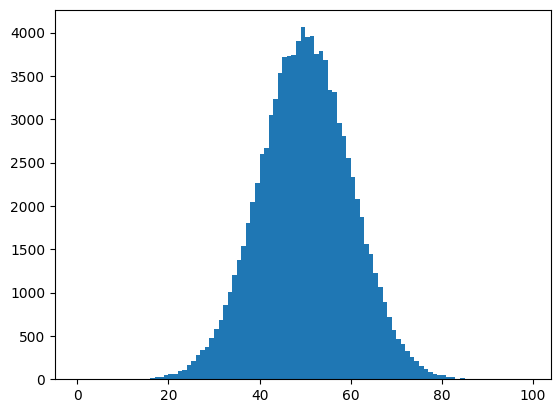

In [70]:
dist = np.random.normal(loc=50,scale=10,size = 100000)
dist = np.sort(dist)

fig = pyplt.figure()

ax = fig.add_subplot()
ax.hist(dist,np.array(range(0,100,1)))
